In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (12,7)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [1]:
df = pd.read_csv("hearing_test.csv")
df.head()

<IPython.core.display.Javascript object>

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


## EDA

Lojistik regresyon gibi klassifikasyon modellerde target daki hedef değişken her zaman 1 olacak örneğin 

kanser + olanlar = 1

Spam var yok algoritmasında spamlar = 1

Dersi geçmeyenlere yönelik alkgoritmada geçemeyneler = 1 olacak

Kısaca olumlu olumsuz olanra göre dewğil hedef değişkene göre sınıflandırma yapacağız. ilk başta

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [4]:
df["test_result"].value_counts() ## Data Balance mı Unbalance mı?

1    3000
0    2000
Name: test_result, dtype: int64

<IPython.core.display.Javascript object>

C:\Users\mtker\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


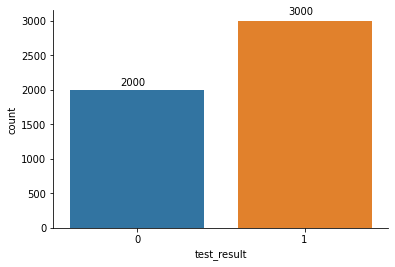

In [5]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

<IPython.core.display.Javascript object>

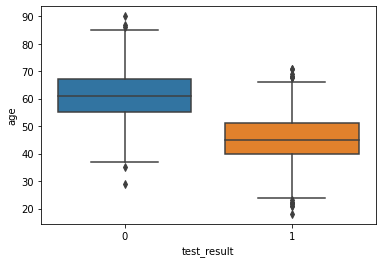

In [6]:
sns.boxplot(x='test_result',y='age',data=df);

<IPython.core.display.Javascript object>

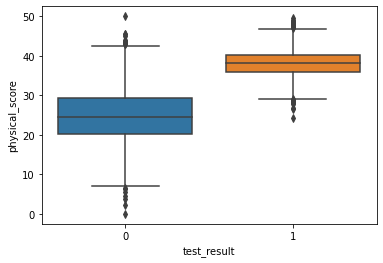

In [7]:
sns.boxplot(x='test_result',y='physical_score',data=df);

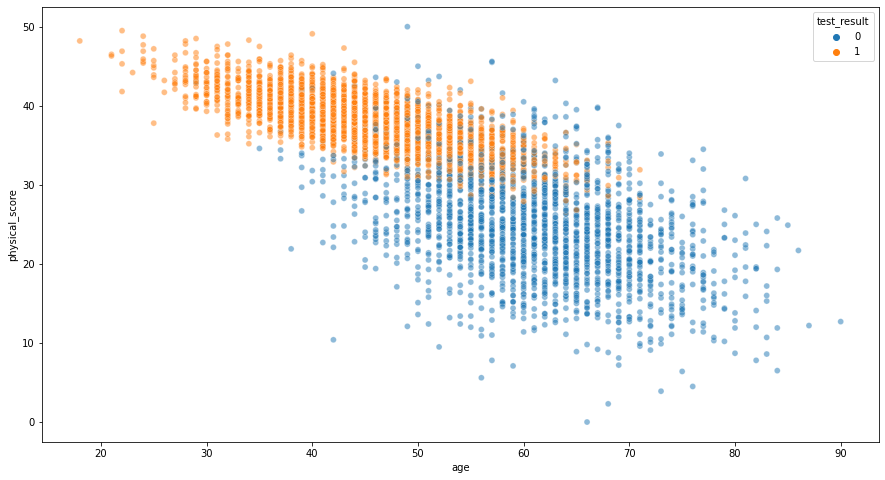

In [10]:
sns.scatterplot(x="age", y="physical_score", data = df, hue = "test_result", alpha = 0.5); ## hue paramtresine her zaman taget ver

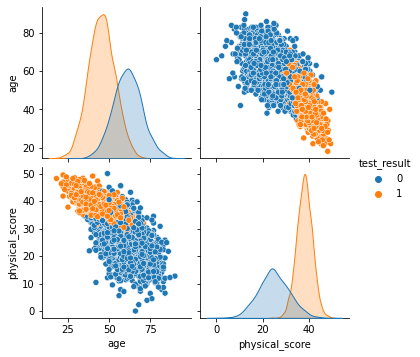

In [12]:
sns.pairplot(df, hue = "test_result");

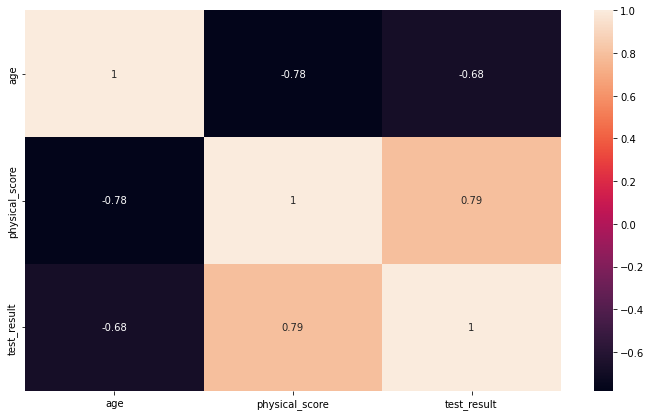

In [15]:
sns.heatmap(df.corr(), annot = True);

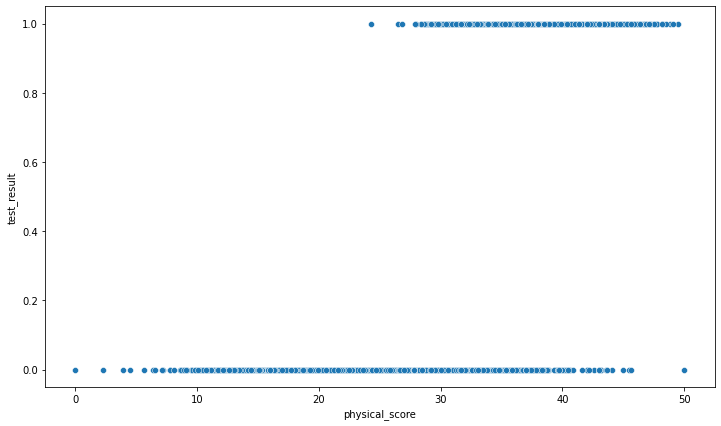

In [16]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

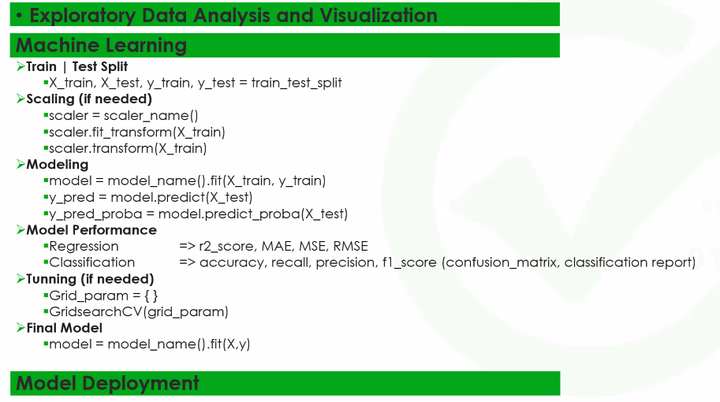

## Train | Test Split and Scaling

In [17]:
X = df.drop("test_result", axis = 1)
y = df["test_result"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101) #test size == > amacımız train setine eğitim için maximum veri sağlamak olmalı.

## Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train) #scale fit işlemini sadece X_train uygulanır
X_test_scaled = scaler.transform(X_test)

## Modeling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression()

In [25]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
log_model.coef_ ## Normalde bakmayacağız sadece ilk defa olduğundan bakıyoruz

array([[-0.94953524,  3.45991194]])

In [27]:
log_model.intercept_

array([0.48867341])

In [28]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [30]:
y_pred_proba = log_model.predict_proba(X_test_scaled) ## olasılık hesaplarını görmek için kullanılan kod
y_pred_proba ## ilk derse özel sonradan buna bakmayacağız

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

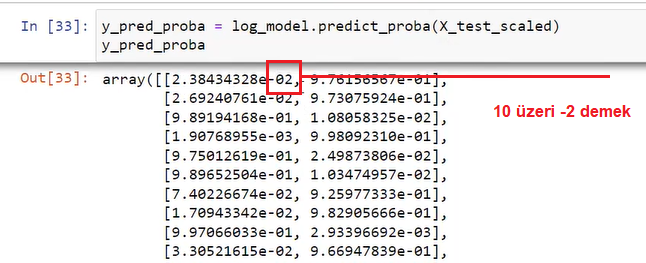

In [31]:
test_data = pd.concat([X_test, y_test], axis = 1) ## ilk derse özel
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [32]:
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.025
...,...,...,...,...
4770,46.000,37.700,1,0.956
188,59.000,36.500,1,0.813
3335,54.000,22.800,0,0.019
4583,58.000,20.500,0,0.005


In [33]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.025,0
...,...,...,...,...,...
4770,46.000,37.700,1,0.956,1
188,59.000,36.500,1,0.813,1
3335,54.000,22.800,0,0.019,0
4583,58.000,20.500,0,0.005,0


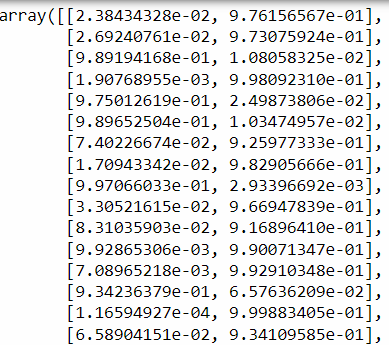

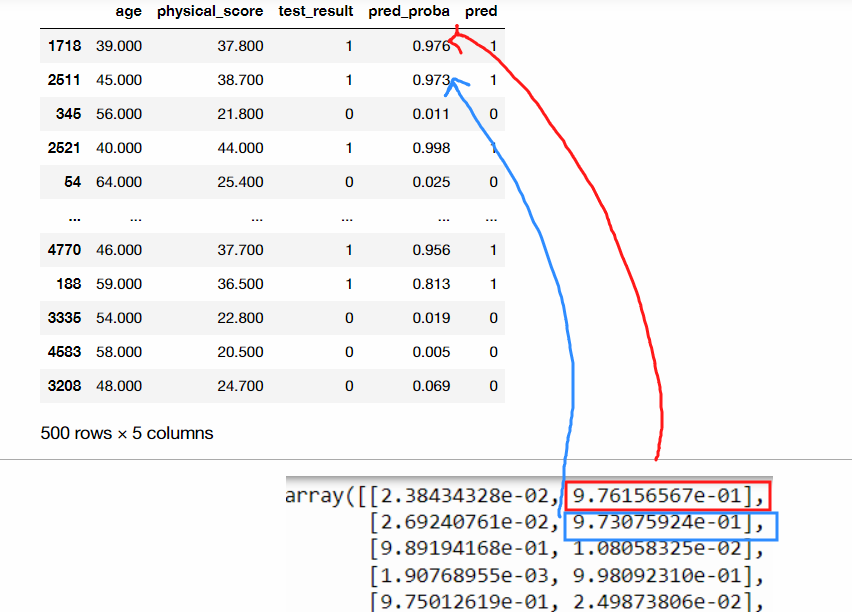

In [35]:
test_data.sample(20)

,age,physical_score,test_result,pred_proba,pred
1498,50.000,25.500,0,0.080,0
4033,65.000,25.000,0,0.019,0
2804,61.000,11.900,0,0.000,0
372,59.000,24.600,0,0.027,0
2627,52.000,35.200,1,0.819,1
3377,30.000,43.600,1,0.999,1
3138,47.000,39.800,1,0.980,1
1656,62.000,20.100,0,0.003,0
3294,58.000,36.900,1,0.849,1
1932,52.000,38.000,1,0.937,1


Adem Hocanın skoru
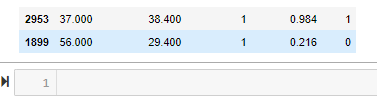

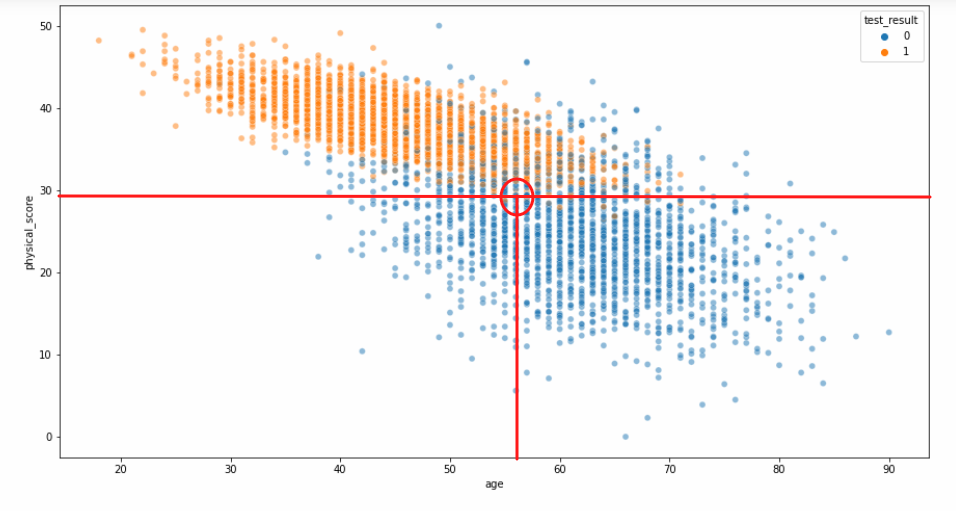

Hatalı olanları getirmek için Anıl Beyden destek

In [36]:
test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1)) ]

,age,physical_score,test_result,pred_proba,pred
2371,46.000,36.400,0,0.926,1
618,63.000,33.400,1,0.454,0
2145,65.000,35.200,0,0.602,1
3200,60.000,32.900,1,0.465,0
1726,46.000,36.700,0,0.934,1
3731,57.000,31.900,1,0.422,0
3330,57.000,37.000,0,0.864,1
4582,44.000,33.400,0,0.806,1
1165,57.000,34.600,0,0.697,1
1525,46.000,30.700,0,0.527,1


## Model Performance on Classification Tasks

precision_score

recall_score,

accuracy_score,

f1_score

https://medium.com/academy-team/makine-%C3%B6%C4%9Frenmesi-s%C4%B1n%C4%B1fland%C4%B1rma-modelleri-accuracy-precission-recall-f1-score-log-loss-and-e2c37fbcf285

In [37]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

### Accuracy (Doğruluk):

Doğruluk (Accuracy): Modelin doğru tahmin ettiği örneklerin oranıdır. Doğruluğun maksimum değeri 1 olabilir. Örneğin, 100 örneğin 80'inin doğru sınıflandırıldığı bir modelin doğruluk skoru 0.8 olacaktır. Aşağıdaki formülden de anlaşılacağı üzere doğruluk doğru bilinen tahminlerin tüm tahminlere oranı olarak ifade edilebilir.

Formül:

Doğruluk = (TP + TN) / (TP + TN + FP + FN)

TP (True Positive): doğru pozitif sayısı

TN (True Negative): doğru negatif sayısı

FP (False Positive): yanlış pozitif sayısı

FN (False Negative): yanlış negatif sayısıdır.


In [38]:
accuracy_score(y_test, y_pred)

0.93

In [39]:
log_model.score(X_test_scaled, y_test) # log_model içine x ve y testleri alır. accuracy_score ile aynı değerleri verir. 

0.93

### Test Size % 20 olan arkadaşların aldığı skor (karşılaştırma için). Train datasına daha fazla gözlem ayırmak daha iyi skor almayı etkiliyor mu nun cevabı

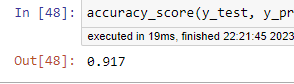

## Precision (Hassasiyet)

Pozitif olarak sınıflandırılan örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Hassasiyet modelin pozitif sınıfı doğru sınıflandırma yeteneğini ölçmektedir. Hassasiyet skoru, yanlış pozitif sınıflandırmaların sayısını (yanlış pozitifler) gerçek pozitif sınıflandırmaların sayısına (doğru pozitifler) oranlaması ile hesaplanmaktadır. Aşağıdaki formülden de anlaşılacağı üzere hassasiyet pozitif olarak doğru bilinen tahminlerin tüm pozitif tahminlere oranı olarak ifade edilebilir.

Formül:

Hassasiyet = TP / (TP + FP)

TP (True Positive): doğru pozitif sayısı

FP (False Positive): yanlış pozitif sayısı


Örnek: 100 örneğin 80'ini pozitif olarak sınıflandıran bir modelin %75 hassasiyeti varsa, 60 örneğin gerçekten pozitif olduğunu söyleyebiliriz.

In [41]:
precision_score(y_test, y_pred)

0.9331210191082803

### Test Size % 20 olan arkadaşların aldığı skor (karşılaştırma için). Train datasına daha fazla gözlem ayırmak daha iyi skor almayı etkiliyor mu nun cevabı


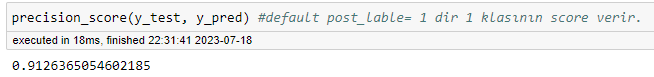

## Recall (Duyarlılık)